In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

fct_df = pd.read_csv("fct_invoice.csv")

fct_df

,invoice_no,customer_id,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,229,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,3433,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,644,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,4900,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,1089,Books,4,60.60,Cash,24/10/2021,Kanyon
...,...,...,...,...,...,...,...,...
99452,I219422,2344,Souvenir,5,58.65,Credit Card,21/09/2022,Kanyon
99453,I325143,172,Food & Beverage,2,10.46,Cash,22/09/2021,Forum Istanbul
99454,I824010,425,Food & Beverage,2,10.46,Debit Card,28/03/2021,Metrocity
99455,I702964,577,Technology,4,4200.00,Cash,16/03/2021,Istinye Park


In [8]:
#Easy #1: How many unique customers are in the dataset?

print("There are", len(fct_df['customer_id'].unique()), "unique customers in the dataset.")

There are 5191 unique customers in the dataset.


In [9]:
#Easy #2: What are the different categories of products available? How many unique categories are there?

print("The different categories of products are", fct_df['category'].unique(), ". There are", len(fct_df['category'].unique()), "unique categories.")

The different categories of products are ['Clothing' 'Shoes' 'Books' 'Cosmetics' 'Food & Beverage' 'Toys'
 'Technology' 'Souvenir'] . There are 8 unique categories.


In [10]:
#Easy #3: Which payment method is the most popular? How many times was it used?

dct = dict(fct_df['payment_method'].value_counts())
most_popu = list(dct.keys())

print("The most popular payment method is", most_popu[0], "which was used", dct[most_popu[0]], "times.")

The most popular payment method is Cash which was used 44447 times.


In [18]:
#Medium #1: What are the three most popular categories, by total sales?

fct_df['total_sales'] = fct_df['quantity']*fct_df['price']

fct_df.groupby(['category']).sum()['total_sales'].nlargest(3)

C:\Users\megan\AppData\Local\Temp\ipykernel_1164\2837130744.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  fct_df.groupby(['category']).sum()['total_sales'].nlargest(3)


category
Clothing      1.139968e+08
Shoes         6.655345e+07
Technology    5.786235e+07
Name: total_sales, dtype: float64

In [3]:
json_df = pd.read_json("dim_customer.json")
json_df

,age,first_name,gender,id,last_name
0,48.0,Nicholas,M,0,Flores
1,NaN,Jeffery,M,1,Rowe
2,57.0,Alexis,F,2,Benton
3,73.0,Amy,F,3,Johnson
4,20.0,David,M,4,Moore
...,...,...,...,...,...
5186,NaN,Arthur,M,9428,Harris
5187,NaN,David,M,9494,Roy
5188,85.0,Thomas,M,10350,Turner
5189,NaN,April,F,10587,Sanchez


In [19]:
df3 = pd.merge(fct_df, json_df, left_on = "customer_id", right_on = "id")

df3

,invoice_no,customer_id,category,quantity,price,payment_method,invoice_date,shopping_mall,total_sales,age,first_name,gender,id,last_name
0,I138884,229,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon,7502.00,NaN,William,M,229,Anderson
1,I126377,229,Cosmetics,2,81.32,Credit Card,5/4/2021,Metrocity,162.64,NaN,William,M,229,Anderson
2,I178419,229,Shoes,3,1800.51,Debit Card,1/6/2021,Istinye Park,5401.53,NaN,William,M,229,Anderson
3,I847727,229,Clothing,3,900.24,Credit Card,21/08/2022,Zorlu Center,2700.72,NaN,William,M,229,Anderson
4,I219251,229,Shoes,5,3000.85,Credit Card,23/06/2022,Istinye Park,15004.25,NaN,William,M,229,Anderson
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99452,I198027,4973,Shoes,1,600.17,Cash,8/11/2021,Kanyon,600.17,NaN,Melissa,F,4973,Bell
99453,I989120,6161,Books,5,75.75,Cash,8/1/2021,Viaport Outlet,378.75,36.0,Leslie,F,6161,Bass
99454,I791963,6779,Clothing,5,1500.40,Credit Card,6/3/2021,Metropol AVM,7502.00,NaN,Kelly,F,6779,Roberts
99455,I100582,8386,Clothing,2,600.16,Cash,2/11/2021,Istinye Park,1200.32,47.0,Shawn,M,8386,Perez


In [21]:
#Medium #2: What are the total sales attributed to customers over the age of 45?

df3.groupby(['age']).sum()['total_sales']

dct = dict(df3.groupby(['age']).sum()['total_sales'])

ages = list(dct.keys())

sales_sum = 0 

for age in range(len(ages)):
    if ages[age] > 45:
        sales_sum = sales_sum + dct[ages[age]]

print("The total sales attributed to customers over the age of 45 is", sales_sum)

The total sales attributed to customers over the age of 45 is 82039768.15


C:\Users\megan\AppData\Local\Temp\ipykernel_1164\3003995093.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df3.groupby(['age']).sum()['total_sales']
C:\Users\megan\AppData\Local\Temp\ipykernel_1164\3003995093.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dct = dict(df3.groupby(['age']).sum()['total_sales'])


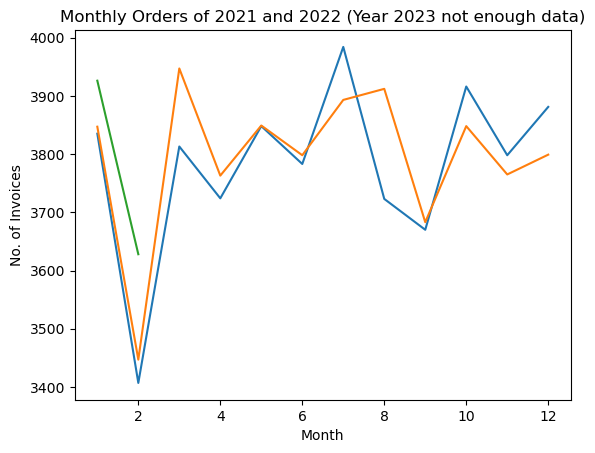

In [39]:
df3['date_time'] = pd.to_datetime(df3['invoice_date'], format = "%d/%m/%Y")
df3['month'] = df3['date_time'].dt.month
df3['year'] = df3['date_time'].dt.year

df3.groupby(['year','month']).count()

for year in [2021, 2022, 2023]:
    dummy_df = df3.groupby(['year', 'month']).count()['invoice_no'].loc[year]
    x = dummy_df.index
    y = dummy_df.values
    
    if year == 2023:
        y = y[0:2]
        x = x[0:2]
    
    plt.plot(x,y)
    plt.title("Monthly Orders of 2021 and 2022 (Year 2023 not enough data)")
    plt.xlabel("Month")
    plt.ylabel("No. of Invoices")
    
plt.show()

C:\Users\megan\AppData\Local\Temp\ipykernel_1164\204262370.py:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dummy_df = df3.groupby(['year', 'month']).sum()['total_sales'].loc[year]
C:\Users\megan\AppData\Local\Temp\ipykernel_1164\204262370.py:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dummy_df = df3.groupby(['year', 'month']).sum()['total_sales'].loc[year]
C:\Users\megan\AppData\Local\Temp\ipykernel_1164\204262370.py:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select 

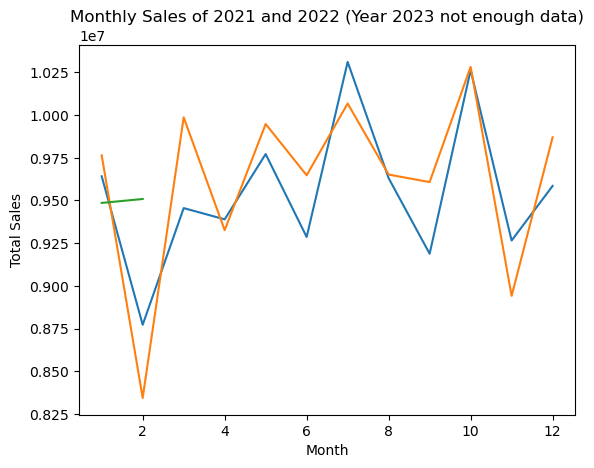

In [40]:
df3['date_time'] = pd.to_datetime(df3['invoice_date'], format = "%d/%m/%Y")
df3['month'] = df3['date_time'].dt.month
df3['year'] = df3['date_time'].dt.year

df3.groupby(['year','month']).count()

for year in [2021, 2022, 2023]:
    dummy_df = df3.groupby(['year', 'month']).sum()['total_sales'].loc[year]
    x = dummy_df.index
    y = dummy_df.values
    
    if year == 2023:
        y = y[0:2]
        x = x[0:2]
    
    plt.plot(x,y)
    plt.title("Monthly Sales of 2021 and 2022 (Year 2023 not enough data)")
    plt.xlabel("Month")
    plt.ylabel("Total Sales")
    
plt.show()

In [41]:
# Hard#1: Create a pivot table showing the breakdown of sales across these dimensions, in this order: category, decade age range (e.g., 10-19, 20-29, and so forth)

new_df = df3[['total_sales','category','age']].copy()

new_df = new_df.dropna()

new_df['decade_range'] = new_df['age'].apply(lambda x: str(int(x//10*10))+"-"+str(int(x//10*10+9)) if x != None else x)

table = pd.pivot_table(new_df, values='total_sales', index=['category'],
                       columns=['decade_range'], aggfunc=np.sum)


table

decade_range,10-19,20-29,30-39,40-49,50-59,60-69,70-79,80-89
category,,,,,,,,
Books,12801.75,79461.75,84143.10,87203.40,74962.20,80476.80,54827.85,26664.00
Clothing,1927413.84,10250732.80,11354126.96,11215189.92,10321851.76,10660642.08,7769371.28,4493698.00
Cosmetics,109619.36,605915.32,723544.70,665034.96,587780.96,649990.76,419082.62,254531.60
Food & Beverage,13582.31,73491.96,87246.86,89553.29,72425.04,80976.09,55050.98,31332.93
Shoes,993281.35,5924878.24,7200839.66,7025590.02,5852857.84,5978893.54,4480269.05,2628744.60
Souvenir,12375.15,54943.32,64092.72,66391.80,54943.32,55025.43,38673.81,23718.06
Technology,1129800.00,5261550.00,6159300.00,5954550.00,4435200.00,5471550.00,3638250.00,1946700.00
Toys,60426.24,385100.80,420582.40,390906.88,345067.52,363955.20,273244.16,153932.80
